In [28]:
import numpy as np
import pandas as pd
from datetime import datetime
from dateutil import parser
from pandas.tseries.offsets import BDay
from sklearn.metrics import mean_squared_error

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn; seaborn.set()

import copy

# Airline Data

In [29]:
airlines = read_csv('airline_passengers.csv', header=0, index_col=0)
airlines

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


/home/david/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Month'>

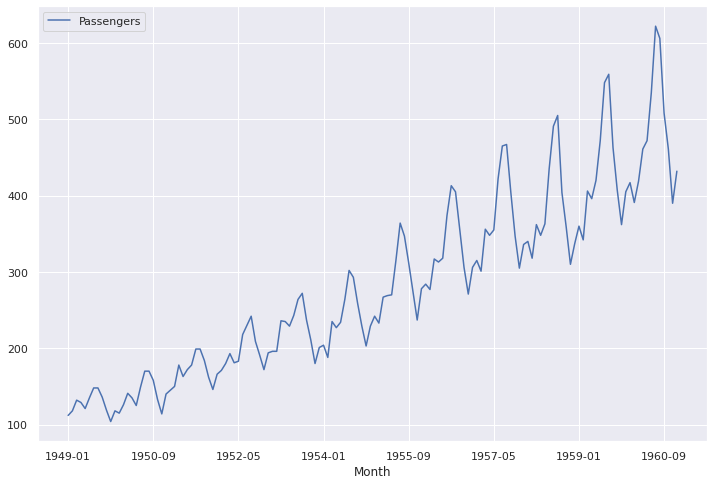

In [30]:
fig, ax = plt.subplots(figsize=(12,8))
#ax.plot(series.index, series.Births)
airlines.plot(ax = ax)

array([<AxesSubplot:title={'center':'Passengers'}>], dtype=object)

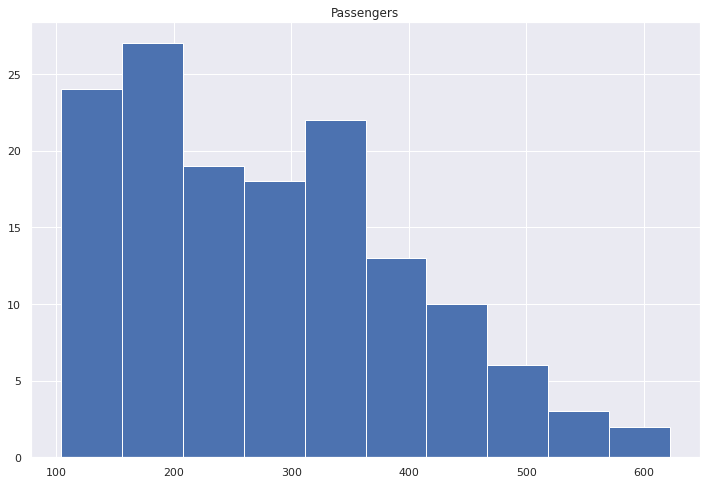

In [31]:
fig, ax = plt.subplots(figsize=(12,8))
airlines.hist(ax = ax)

In [32]:
X = airlines.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=182.902778, mean2=377.694444
variance1=2244.087770, variance2=7367.962191


### log transformation

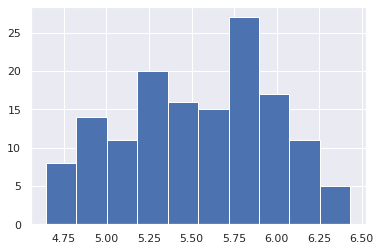

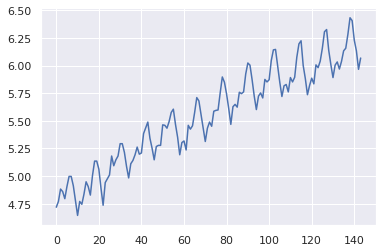

In [34]:
X = airlines.values
X = np.log(X)
pyplot.hist(X)
pyplot.show()
pyplot.plot(X)
pyplot.show()

In [36]:
X = airlines.values
X = np.log(X)
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=5.175146, mean2=5.909206
variance1=0.068375, variance2=0.049264


# Birth Data

In [9]:
birth = pd.read_csv('female_birth.csv', header=0, index_col=0)
birth

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


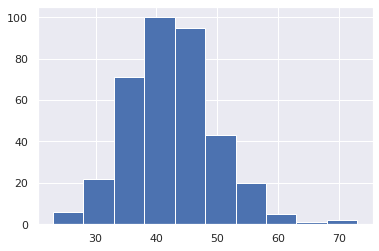

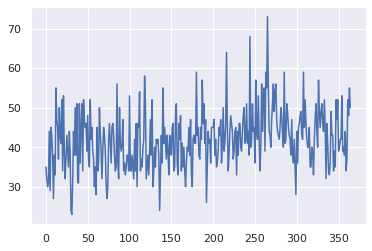

In [44]:
X = birth.values
pyplot.hist(X)
pyplot.show()
pyplot.plot(X)
pyplot.show()

In [11]:
X = birth.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=39.763736, mean2=44.185792
variance1=49.213410, variance2=48.708651


# Augmented Dickey-Fuller test

In [37]:
from statsmodels.tsa.stattools import adfuller

In [40]:
X = birth.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


In [41]:
X = airlines.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [42]:
X = np.log(airlines.values)
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.717017
p-value: 0.422367
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
